## LSTM

Here’s a step-by-step guide on how to implement an LSTM (Long Short-Term Memory) model using TensorFlow to predict a time series dataset. I'll use a public dataset for demonstration, like the famous Airline Passenger Dataset, which shows the monthly number of airline passengers over a 12-year period.
Steps Involved:

    Loading the Dataset
    Preprocessing the Data
    Building the LSTM Model
    Training the Model
    Evaluating the Model
    Making Predictions

## 1. Loading the Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url)

# Check the first few rows
print(data.head())


     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121


## 2. Preprocessing the Data
We need to preprocess the data by normalizing it and converting it into a suitable format for the LSTM model. LSTMs require data in the shape [samples, time steps, features].

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Extract the passengers column as the feature we want to predict
dataset = data['Passengers'].values
dataset = dataset.astype('float32')

# Normalize the dataset (LSTMs work better with scaled data)
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.reshape(-1, 1))

# Function to convert an array of values into a dataset matrix
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Create a dataset with a look-back of 1 (using the previous month to predict the next)
look_back = 1
X, Y = create_dataset(dataset, look_back)

# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)


## 3. Building the LSTM Model

Now, let’s create an LSTM model using TensorFlow’s Keras API. We’ll create a simple model with a single LSTM layer followed by a Dense layer.

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# Build the LSTM model
model = Sequential()

# Add Input layer
model.add(Input(shape=(look_back, 1)))

# Add LSTM layer
model.add(LSTM(50, return_sequences=False))  # LSTM layer with 50 units

# Add Dense output layer
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Summary of the model
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Training the Model

We will now train the model using the training dataset.



Epoch 1/100
113/113 - 1s - 12ms/step - loss: 0.0426
Epoch 2/100
113/113 - 0s - 1ms/step - loss: 0.0162
Epoch 3/100
113/113 - 0s - 2ms/step - loss: 0.0119
Epoch 4/100
113/113 - 0s - 1ms/step - loss: 0.0080
Epoch 5/100
113/113 - 0s - 1ms/step - loss: 0.0051
Epoch 6/100
113/113 - 0s - 1ms/step - loss: 0.0036
Epoch 7/100
113/113 - 0s - 1ms/step - loss: 0.0028
Epoch 8/100
113/113 - 0s - 1ms/step - loss: 0.0028
Epoch 9/100
113/113 - 0s - 1ms/step - loss: 0.0030
Epoch 10/100
113/113 - 0s - 1ms/step - loss: 0.0028
Epoch 11/100
113/113 - 0s - 2ms/step - loss: 0.0029
Epoch 12/100
113/113 - 0s - 2ms/step - loss: 0.0029
Epoch 13/100
113/113 - 0s - 2ms/step - loss: 0.0028
Epoch 14/100
113/113 - 0s - 2ms/step - loss: 0.0029
Epoch 15/100
113/113 - 0s - 2ms/step - loss: 0.0027
Epoch 16/100
113/113 - 0s - 1ms/step - loss: 0.0028
Epoch 17/100
113/113 - 0s - 1ms/step - loss: 0.0028
Epoch 18/100
113/113 - 0s - 1ms/step - loss: 0.0028
Epoch 19/100
113/113 - 0s - 1ms/step - loss: 0.0027
Epoch 20/100
113/113

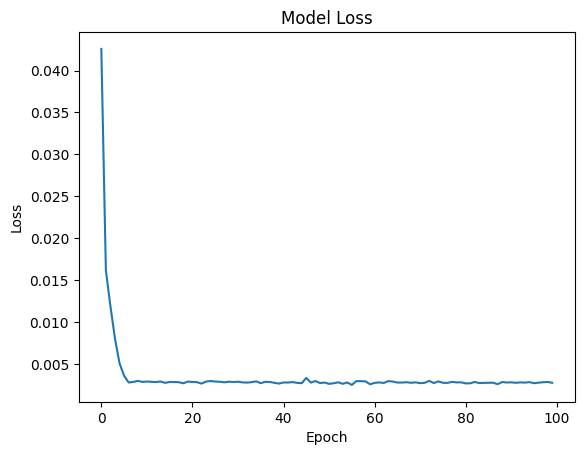

In [8]:
# Train the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)

# Plot training loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


Explanation:

fit(): This method trains the model for 100 epochs using a batch size of 1. The model’s performance is printed for each epoch (verbose=2). The loss is plotted over the training period to see how the model improves over time.

### 5. Evaluating the Model

After training, we evaluate the model on the test data to see how well it generalizes.



In [9]:
# Make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

# Inverse the predictions to get the original scale
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

# Inverse the true values to get the original scale
Y_train_original = scaler.inverse_transform([Y_train])
Y_test_original = scaler.inverse_transform([Y_test])

# Calculate the RMSE (Root Mean Squared Error)
trainScore = np.sqrt(np.mean((trainPredict[:,0] - Y_train_original[0])**2))
testScore = np.sqrt(np.mean((testPredict[:,0] - Y_test_original[0])**2))

print(f'Train Score: {trainScore:.2f} RMSE')
print(f'Test Score: {testScore:.2f} RMSE')


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Train Score: 26.47 RMSE
Test Score: 52.67 RMSE


Explanation:
predict(): This method is used to make predictions on both the training and test datasets.
scaler.inverse_transform(): The predictions are scaled back to the original range.
RMSE: We use Root Mean Squared Error (RMSE) to evaluate the model. RMSE measures the difference between predicted values and actual values.

6. Making Predictions and Visualizing the Results

Finally, we plot the predicted values against the actual data to visualize how well the model performs.

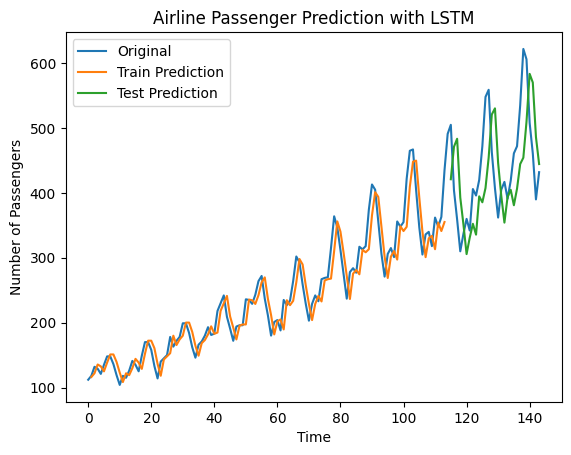

In [10]:
# Shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan

# Correct the index calculation for test predictions
test_start_idx = len(trainPredict) + (look_back * 2)
testPredictPlot[test_start_idx:test_start_idx + len(testPredict), :] = testPredict

# Plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title('Airline Passenger Prediction with LSTM')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.legend(['Original', 'Train Prediction', 'Test Prediction'])
plt.show()
